# Analisando os dados

> Esse notebook faz uma análise exploratória dos dados

Ele não é o único a armazenar as visualizações a serem desenvolvidas nesse projeto, mas será um bom ponto de partida para entender os dados que estão sendo utilizados.

In [15]:
import random
from pathlib import Path

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Carregando os dados

In [2]:
scrap_file = Path('output.pickle')

In [3]:
assert scrap_file.exists(), "Arquivo com dados raspados não foi encontrado. Verifique que o notebook 00_data_preprocessing.ipynb foi executado."

In [4]:
df = pd.read_pickle(scrap_file)
df.head()

,codigo,disciplina,criacao,n_creditos,carga_teorica,carga_pratica,carga_estudo,duracao,carga_total,docentes_responsaveis,...,conteudo,bibliografia,idioma,oferecimento,codigo_area_concentracao,area_concentracao,codigo_commissao,commissao,codigo_programa,nome_programa
0,DCV5969,Projeto de Reforma do Código Civil,2024-05-22,8,2,2,4,2520,120,,...,1) Codificar ou não codificar? Eis a questão; ...,"BIANCA, Cesare Massimo. L'obbligazione nelle ...",Português,Presencial,2131,Direito Civil,2,Faculdade de Direito,2001,Direito
1,DCV5963,Direito Notarial e Registral: Novas Perspectiv...,2021-11-17,8,2,2,4,2520,120,,...,A disciplina será estruturada em aulas exposit...,"ALVIM NETO, José Manoel Arruda; CLÁPIS, Alexan...",Português,Presencial,2131,Direito Civil,2,Faculdade de Direito,2001,Direito
2,DCV5962,Temas Atuais de Família e Sucessão,2021-05-03,8,2,2,4,2520,120,Claudio Luiz Bueno de Godoy | Fernando Campos ...,...,A disciplina será formada tanto por aulas expo...,"ABRAMS, Douglas E., Contemporary Family Law, 4...",Português,Presencial,2131,Direito Civil,2,Faculdade de Direito,2001,Direito
3,DCV5961,Direito da Arte e Patrimônio Cultural,2023-06-28,8,2,2,4,2520,120,Silmara Juny de Abreu Chinellato | Antonio Car...,...,Ementa \nDireito da Arte. Multidisciplinarieda...,"ASCENSÃO, José de Oliveira. Direito autoral. 2...",Português,Presencial,2131,Direito Civil,2,Faculdade de Direito,2001,Direito
4,DCV5955,Dogmática e Crítica da Jurisprudência,2025-04-23,8,2,2,4,2520,120,Alexandre de Moraes | Otavio Luiz Rodrigues Ju...,...,§1 Introdução e apresentação da disciplina. §2...,"ÁVILA, Humberto. “Neoconstitucionalismo”: entr...",Português,Presencial,2131,Direito Civil,2,Faculdade de Direito,2001,Direito


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2244
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   codigo                    2213 non-null   object        
 1   disciplina                2213 non-null   object        
 2   criacao                   2213 non-null   datetime64[ns]
 3   n_creditos                2213 non-null   int64         
 4   carga_teorica             2213 non-null   int64         
 5   carga_pratica             2213 non-null   int64         
 6   carga_estudo              2213 non-null   int64         
 7   duracao                   2213 non-null   int64         
 8   carga_total               2213 non-null   int64         
 9   docentes_responsaveis     2213 non-null   object        
 10  objetivos                 2213 non-null   object        
 11  justificativa             2213 non-null   object        
 12  avaliacao                

## Analisando os dados

Essa seção irá responder algumas perguntas básicas a partir dos dados coletados.

### Qual o número de comissões, docentes, disciplinas e áreas de concentração?

In [6]:
unique_comissoes = df['commissao'].unique()
len(unique_comissoes)

64

In [7]:
unique_area_concentracao = df['area_concentracao'].unique()
len(unique_area_concentracao)

337

In [8]:
unique_disciplinas = df['disciplina'].unique()
len(unique_disciplinas)

2174

In [9]:
unique_docentes = df['docentes_responsaveis'].str.split('|').explode().str.strip().unique()
len(unique_docentes)

2798

### Qual disciplina com a maior carga horária e qual tem maior crédito?

In [10]:
df.loc[df['carga_total'].idxmax()]

codigo                                                                MPT5808
disciplina                  Surtos, Epidemias, Saúde Única e Saúde Global ...
criacao                                                   2022-02-10 00:00:00
n_creditos                                                                 15
carga_teorica                                                               4
carga_pratica                                                               4
carga_estudo                                                                7
duracao                                                                  2520
carga_total                                                               225
docentes_responsaveis       Ana Catharina de Seixas Santos Nastri | Amaro ...
objetivos                   A disciplina tem como objetivos:\nApresentar a...
justificativa               Epidemias e surtos de doenças infecciosas (eme...
avaliacao                       Seminário\nParticipação do aluno

In [11]:
df.loc[df['n_creditos'].idxmax()]

codigo                                                                MPT5808
disciplina                  Surtos, Epidemias, Saúde Única e Saúde Global ...
criacao                                                   2022-02-10 00:00:00
n_creditos                                                                 15
carga_teorica                                                               4
carga_pratica                                                               4
carga_estudo                                                                7
duracao                                                                  2520
carga_total                                                               225
docentes_responsaveis       Ana Catharina de Seixas Santos Nastri | Amaro ...
objetivos                   A disciplina tem como objetivos:\nApresentar a...
justificativa               Epidemias e surtos de doenças infecciosas (eme...
avaliacao                       Seminário\nParticipação do aluno

### Quais modalidades disciplinas são ofertados e quais idiomas?

In [12]:
df['oferecimento'].unique()

array(['Presencial', 'Não-Presencial'], dtype=object)

In [13]:
df['idioma'].unique()

array(['Português', 'Francês', 'Espanhol', 'Inglês', 'Japonês',
       'Italiano', 'Polonês'], dtype=object)

## Visualizando dados

Essa seção apresenta algumas visualizações básicas acerca dos dados.

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Surtos, Epidemias, Saúde Única e Saúde Global pela Ótica da Patologia das Doenças Infecciosas (PATOEPI)'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Seminários Avançados em Nutrição e Cirurgia Bariátrica: Abordagens Multidisciplinares e Novas Tecnologias no Tratamento da Obesidade'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Estudos Avançados em Doenças Raras da Infância'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Métodos Aplicados para Analisar o Sistema Estomatognático'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'Mecânica da Fratura: Fundamentos e Aplicações'),
  Text(4.5, 0, '')])

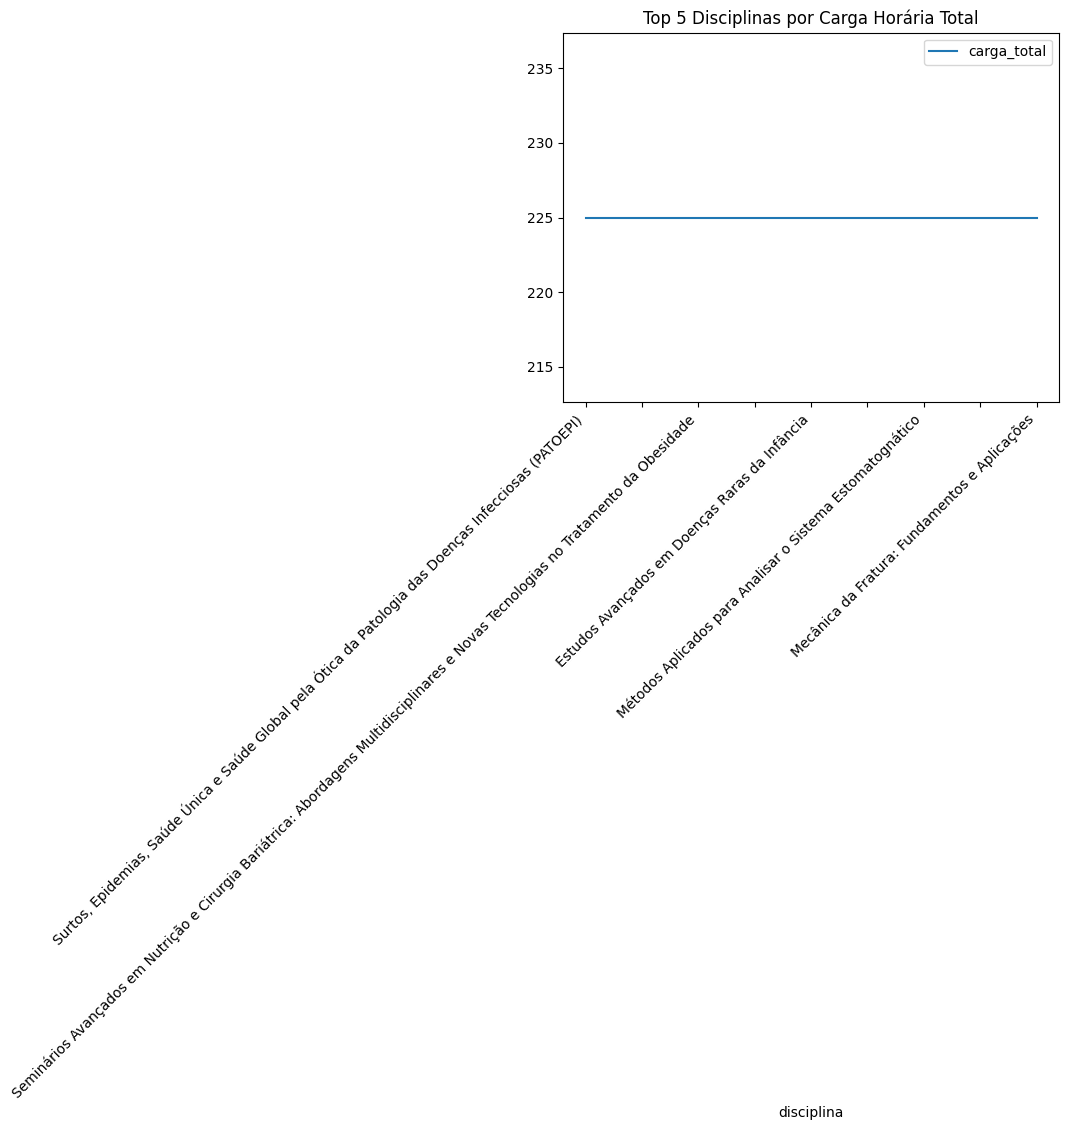

In [16]:
df.nlargest(n=5, columns=['carga_total']).plot(x='disciplina', y='carga_total', title='Top 5 Disciplinas por Carga Horária Total')
plt.xticks(rotation=45, ha='right')

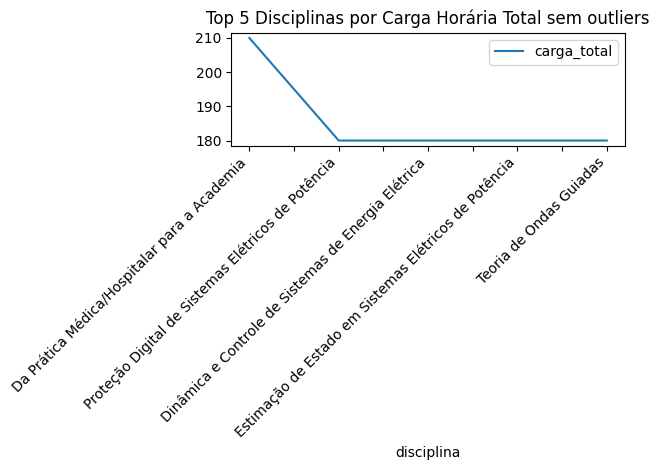

In [17]:
coluna = 'carga_total'
Q1 = df[coluna].quantile(0.25)
Q3 = df[coluna].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df_filtrado = df[
    (df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)
]
df_filtrado.nlargest(n=5, columns=[coluna]).plot(x='disciplina', y='carga_total', title='Top 5 Disciplinas por Carga Horária Total sem outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [48]:
df_docentes = df.copy()
df_docentes['docentes'] = df_docentes['docentes_responsaveis'].str.split('|')
df_exploded = df_docentes.explode('docentes')
df_exploded = df_exploded.rename(columns={'docentes': 'docente'})
df_exploded['docente'] = df_exploded['docente'].str.strip()

In [49]:
df_exploded = df_exploded[df_exploded['commissao'] == 'Instituto de Ciências Matemáticas e de Computação']

In [50]:
G = nx.Graph()

In [51]:
for index, row in df_exploded.iterrows():
    node_id = f"D_{row['disciplina']}"
    G.add_node(
        node_id, 
        type='Disciplina', 
        size=row['carga_total'], 
        area=row['area_concentracao']
    )

In [52]:
docentes_list = df_exploded['docente'].unique()
for docente in docentes_list:
    G.add_node(docente, type='Docente', size=100, area='Docente') 

In [53]:
for index, row in df_exploded.iterrows():
    discipline_node = f"D_{row['disciplina']}"
    docente_node = row['docente']
    G.add_edge(discipline_node, docente_node)

/tmp/ipykernel_16839/9123963.py:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



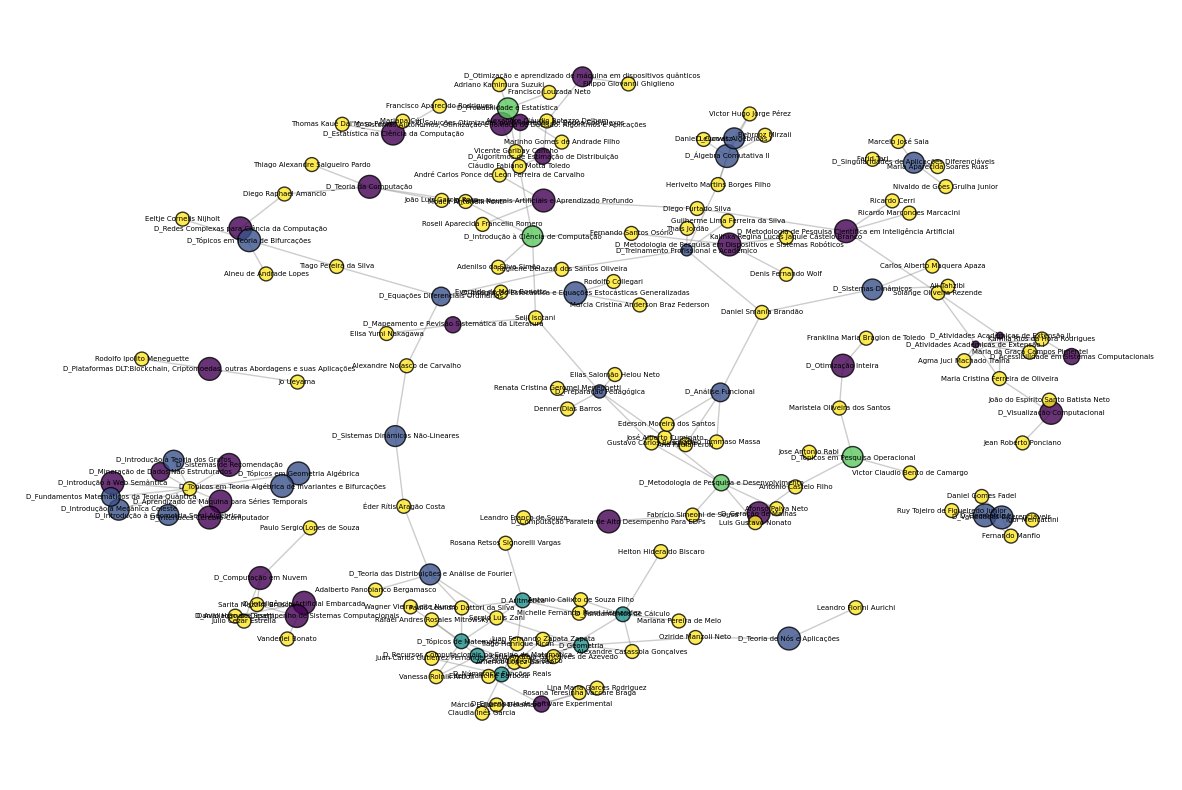

In [82]:
discipline_sizes = [G.nodes[node]['size'] * 1.5 if G.nodes[node]['type'] == 'Disciplina' else 100 for node in G.nodes()]

areas = df_exploded['area_concentracao'].unique().tolist()
areas.append('Docente')
cmap = plt.cm.get_cmap('viridis', len(areas))
area_to_color = {area: cmap(i) for i, area in enumerate(areas)}

node_colors = []
for node in G.nodes():
    if G.nodes[node]['type'] == 'Disciplina':
        node_colors.append(area_to_color[G.nodes[node]['area']])
    else:
        node_colors.append(area_to_color['Docente'])

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.8, iterations=300, seed=42) 
nx.draw_networkx_nodes(
    G, pos,
    node_size=discipline_sizes,
    node_color=node_colors,
    alpha=0.8,
    edgecolors='black'
)

nx.draw_networkx_edges(
    G, pos,
    alpha=0.4,
    edge_color='gray'
)
labels = {node: node[2:] if node.startswith('D_') else node for node in G.nodes()}

nx.draw_networkx_labels(
    G, 
    pos,
    # labels=labels, 
    font_size=5, 
    # font_weight='bold'
)

plt.axis('off')
plt.show()

In [80]:
df_exploded[df_exploded['docente'] == 'Daniel Gomes Fadel']

,codigo,disciplina,criacao,n_creditos,carga_teorica,carga_pratica,carga_estudo,duracao,carga_total,docentes_responsaveis,...,bibliografia,idioma,oferecimento,codigo_area_concentracao,area_concentracao,codigo_commissao,commissao,codigo_programa,nome_programa,docente
1791,SMA5942,Geometria I,2025-06-23,12,4,0,8,2520,180,Ruy Tojeiro de Figueiredo Junior | Fernando Ma...,...,"Fundamental:\nJOYCE, D. D. Riemannian holonomy...",Português,Presencial,55135,Matemática,55,Instituto de Ciências Matemáticas e de Computação,55003,Matemática,Daniel Gomes Fadel
1800,SMA5781,Variedades Diferenciáveis,2025-06-26,12,4,0,8,2520,180,Ruy Tojeiro de Figueiredo Junior | Fernando Ma...,...,"Fundamentais:\n- LEE, J. M. Introduction to sm...",Português,Presencial,55135,Matemática,55,Instituto de Ciências Matemáticas e de Computação,55003,Matemática,Daniel Gomes Fadel


In [81]:
df_exploded[df_exploded['disciplina'] == 'Variedades Diferenciáveis']

,codigo,disciplina,criacao,n_creditos,carga_teorica,carga_pratica,carga_estudo,duracao,carga_total,docentes_responsaveis,...,bibliografia,idioma,oferecimento,codigo_area_concentracao,area_concentracao,codigo_commissao,commissao,codigo_programa,nome_programa,docente
1800,SMA5781,Variedades Diferenciáveis,2025-06-26,12,4,0,8,2520,180,Ruy Tojeiro de Figueiredo Junior | Fernando Ma...,...,"Fundamentais:\n- LEE, J. M. Introduction to sm...",Português,Presencial,55135,Matemática,55,Instituto de Ciências Matemáticas e de Computação,55003,Matemática,Ruy Tojeiro de Figueiredo Junior
1800,SMA5781,Variedades Diferenciáveis,2025-06-26,12,4,0,8,2520,180,Ruy Tojeiro de Figueiredo Junior | Fernando Ma...,...,"Fundamentais:\n- LEE, J. M. Introduction to sm...",Português,Presencial,55135,Matemática,55,Instituto de Ciências Matemáticas e de Computação,55003,Matemática,Fernando Manfio
1800,SMA5781,Variedades Diferenciáveis,2025-06-26,12,4,0,8,2520,180,Ruy Tojeiro de Figueiredo Junior | Fernando Ma...,...,"Fundamentais:\n- LEE, J. M. Introduction to sm...",Português,Presencial,55135,Matemática,55,Instituto de Ciências Matemáticas e de Computação,55003,Matemática,Daniel Gomes Fadel
1800,SMA5781,Variedades Diferenciáveis,2025-06-26,12,4,0,8,2520,180,Ruy Tojeiro de Figueiredo Junior | Fernando Ma...,...,"Fundamentais:\n- LEE, J. M. Introduction to sm...",Português,Presencial,55135,Matemática,55,Instituto de Ciências Matemáticas e de Computação,55003,Matemática,Igor Mencattini
